In [1]:
import sys
sys.path.append('../../../..')
import numpy as np
import matplotlib.pyplot as plt
import rivapy

%load_ext autoreload
%autoreload 2

/home/doeltz/doeltz/development/RiVaPy/rivapy/__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')
2023-04-28 15:18:22.119809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-28 15:18:22.119825: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [25]:
ls_model = rivapy.models.LuciaSchwartz(rho=-.81, kappa = 0.077, sigma1 = 0.1, mu=-0.29, sigma2=0.1)#3.1)

In [26]:
n_sims = 10_000
timegrid = np.linspace(0.0,1.0,365)
rnd = np.random.normal(size=ls_model.rnd_shape(n_sims, timegrid.shape[0]))
paths = ls_model.simulate(timegrid, start_value=np.array([0.0,0.0]), rnd=rnd)

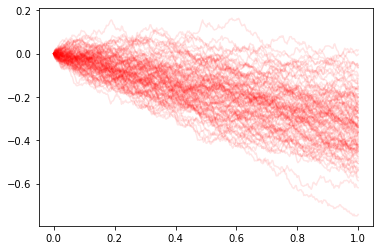

In [27]:
for i in range(100):
    plt.plot(timegrid, paths[:,i],'-r',alpha=0.1)

In [28]:
ls_model.compute_expeted_value(np.array([0.0,0.0]), 1.0)

-0.29

0.011385971425934258 0.15


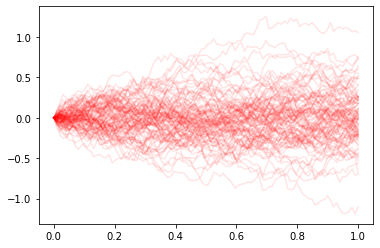

In [41]:
np.random.seed(42)
timegrid = np.linspace(0.0,1.0,100) # simulate on daily timegrid over 1 yr horizon
ls_model = rivapy.models.LuciaSchwartz(rho=-0.9, kappa=1.0, sigma1=0.5, mu=0.15, sigma2=0.3)
n_sims = 160_000
paths = ls_model.simulate(timegrid, start_value=np.array([0.0,0.0]),
                          rnd=np.random.normal(size=ls_model.rnd_shape(timegrid.shape[0],n_sims)))
print(paths[-1,:].mean(), ls_model.compute_expected_value(x0=np.array([0.0,0.0]), T=1.0))
for i in range(100):
    plt.plot(timegrid, paths[:,i],'-r',alpha=0.1)

In [42]:
paths.shape

(100, 100)